In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms, models
from PIL import Image

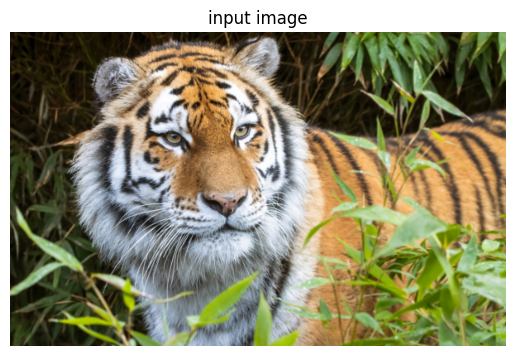

In [8]:
image=Image.open('/content/Tiger.jpg').convert('RGB')
plt.imshow(image)
plt.axis('off')
plt.title('input image')
plt.show()

In [9]:
transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])
input_tensor=transform(image).unsqueeze(0)
model=models.resnet50(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
with torch.no_grad():
  output=model(input_tensor)
  _,indices=torch.topk(output,3)

In [13]:
import json
from urllib.request import *

labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels=[line.strip() for line in urlopen(labels_url).read().decode("utf-8").splitlines()]
print("top 3 predictions:")
for idx in indices[0]:
  print(f"{labels[idx]} ({torch.softmax(output,1)[0][idx].item()*100:.2f}%)")

top 3 predictions:
tiger (89.94%)
tiger cat (10.05%)
jaguar (0.00%)
